In [1]:
import ROOT
from ROOT import gROOT, TString
from ROOT import TCanvas, TLine, TGaxis, TGraph, gPad, TF1, TF2, kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TGraphErrors, TFile, TTree
import json
import math
from array import array
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.30/02


In [2]:
histFile = ROOT.TFile("/Users/thiagorangel/GIFpp_Analysis_Apr24/CO2_analysis/Scans/Scan_005708/Scan005708_HV10_CAEN.root", "READ")

In [3]:
sigma_factor = (6.2*10e-3)/1.5

def HVCurrentDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    HV_top = []    
    HV_bot = []
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    noiseGammaRate = []
    deltaV_top = []
    deltaV_bot = []
    deltaV_top_err = []
    deltaV_bot_err = []
    for scanId in scanIds:
        !echo "None" >> counter.txt
        !rm counter.txt
        path = "Scans/Scan_00"+str(scanId)+"/*_HV*_CAEN.root"
        !ls {path} >> counter.txt
        counter = np.loadtxt("counter.txt", dtype=str)
        if (str(scanId) == '5634') or (str(scanId) == '5630'):
            print("scanId = ", scanId)
            N = len(counter)
        else:
            N = len(counter)+1
        for i in range(1,N):
            jsonFile = open("Scans/Scan_00"+str(scanId)+"/ANALYSIS/KODELE/HV"+str(i)+"/output.json")
            jsonFile = json.load(jsonFile)
            #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanId)+"/Scan00"+str(scanId)+"_HV"+str(i)+"_CAEN.root","READ")
            hist_current_bot = histFile.Get("Imon_KODELE-BOT")
            hist_current_top = histFile.Get("Imon_KODELE-TOP")
            hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
            hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
            #eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            #eff_error.append((jsonFile['output_parameters']['efficiencyMuon_corrected']*(1-jsonFile['output_parameters']['efficiencyMuon_corrected'])/1000)**0.5)
            eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
            muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
            gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
            muon_CS.append(jsonFile['output_parameters']['muonCLS'])
            gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
            muon_CM.append(jsonFile['output_parameters']['muonCMP'])
            gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
            muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
            gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
            muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
            gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
            noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
            current_bot.append(hist_current_bot.GetMean())
            current_top.append(hist_current_top.GetMean())
            HV_top.append(hist_HV_top.GetMean())
            HV_bot.append(hist_HV_bot.GetMean())
            if (scanId == '5630'):
                deltaV_top.append(0.001)
                deltaV_bot.append(0.001)
            else:
                deltaV_top.append(hist_current_top.GetMean()*1.5)
                deltaV_bot.append(hist_current_bot.GetMean()*1.5)
            deltaV_top_err.append(hist_current_top.GetMean()*6.2*10e-3)
            deltaV_bot_err.append(hist_current_bot.GetMean()*6.2*10e-3)
            histFile.Close()
    DataSet = {'HV_top': HV_top, 
               'HV_bot': HV_bot, 
               'current_top': current_top, 
               'current_bot': current_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'deltaV': (np.array(deltaV_top)*np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001))/(np.array(deltaV_top)+np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001)),
               }
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    DataSet['deltaV_err'] = DataSet['deltaV']* sigma_factor *np.sqrt( (1 + (np.sqrt(DataSet['current_top']**2 + DataSet['current_bot']**2 ) / ( DataSet['current_top']+DataSet['current_bot']  ) )**2 ) ) 
    return DataSet
        
#print(HVCurrentDataFrame(5565))


In [4]:
def FeaturesDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    current_bot = []
    current_top = []
    HV_top = []
    HV_bot = []
    noiseGammaRate = []
    noiseGammaRate_err = []
    for scanId in scanIds:
        #jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/output.json")
        print("scanID: ", scanIds[scanId][0])
        
        direc = ""
        N = "1"
        if (int(scanIds[scanId][0])==5810) or (int(scanIds[scanId][0])==5805) or (int(scanIds[scanId][0])==5820) or (int(scanIds[scanId][0])==5826) or (int(scanIds[scanId][0])==5830) or (int(scanIds[scanId][0])==5827) or (int(scanIds[scanId][0])==5815) or (int(scanIds[scanId][0])==5811):    
            N = "7"
        if (int(scanIds[scanId][0])==5841)or (int(scanIds[scanId][0])==5838) or (int(scanIds[scanId][0])==5840):
            N = "8"
        jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/HV"+str(N)+"/output.json")
        histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanIds[scanId][0])+"/Scan00"+str(scanIds[scanId][0])+"_HV"+str(N)+"_CAEN.root","READ")
        hist_current_bot = histFile.Get("Imon_KODELE-BOT")
        hist_current_top = histFile.Get("Imon_KODELE-TOP")
        hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
        hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
        jsonFile = json.load(jsonFile)
        #jsonFile_fornTrig = json.load(jsonFile_fornTrig)
        nTrig = jsonFile['output_parameters']['nTrig']
        #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff.append(100*jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
        muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
        gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
        muon_CS.append(jsonFile['output_parameters']['muonCLS'])
        gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
        muon_CM.append(jsonFile['output_parameters']['muonCMP'])
        gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
        muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
        gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
        muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
        gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
        noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
        noiseGammaRate_err.append(jsonFile['output_parameters']['noiseGammaRate_err'])
        current_bot.append(hist_current_bot.GetMean())
        current_top.append(hist_current_top.GetMean())
        HV_top.append(hist_HV_top.GetMean())
        HV_bot.append(hist_HV_bot.GetMean())
        #print("N: ", N)
        #print("direc: ", direc)
        #print("current: ", hist_current_top.GetMean()+hist_current_bot.GetMean())
        #print("HV: ", hist_HV_top.GetMean())
    DataSet = {'current_top': current_top, 
               'current_bot': current_bot,
               'HV_top': HV_top,
               'HV_bot': HV_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'noiseGammaRate_err': noiseGammaRate_err
              }
        
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    
    return DataSet
        
#print(HVCurrentDataFrame(5565))
        
#print(hist)
#canvas = ROOT.TCanvas("canvas")
#canvas.cd()
#canvas.SetLogy(True)
#hist.Draw("h")


In [5]:
sigmoid1 = TF1("sigmoid1","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid1.SetParNames("Emax","Lambda","HV50")
sigmoid1.SetParameters(0.9, 0.01, 7000)
sigmoid2 = TF1("sigmoid2","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid2.SetParNames("Emax","Lambda","HV50")
sigmoid2.SetParameters(0.9, 0.01, 7000)
sigmoid3 = TF1("sigmoid3","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid3.SetParNames("Emax","Lambda","HV50")
sigmoid3.SetParameters(0.9, 0.01, 7000)
sigmoid4 = TF1("sigmoid4","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid4.SetParNames("Emax","Lambda","HV50")
sigmoid4.SetParameters(0.9, 0.01, 7000)
sigmoid5 = TF1("sigmoid5","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid5.SetParNames("Emax","Lambda","HV50")
sigmoid5.SetParameters(0.9, 0.001, 7000)
sigmoid6 = TF1("sigmoid6","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid6.SetParNames("Emax","Lambda","HV50")
sigmoid6.SetParameters(0.9, 0.01, 7000)
sigmoid7 = TF1("sigmoid7","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid7.SetParNames("Emax","Lambda","HV50")
sigmoid7.SetParameters(0.9, 0.01, 7000)
sigmoid8 = TF1("sigmoid8","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid8.SetParNames("Emax","Lambda","HV50")
sigmoid8.SetParameters(0.9, 0.01, 7000)
sigmoid9 = TF1("sigmoid9","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid9.SetParNames("Emax","Lambda","HV50")
sigmoid9.SetParameters(0.9, 0.001, 7000)
sigmoid10 = TF1("sigmoid10","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid10.SetParNames("Emax","Lambda","HV50")
sigmoid10.SetParameters(0.9, 0.01, 7000)
sigmoid11 = TF1("sigmoid11","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid11.SetParNames("Emax","Lambda","HV50")
sigmoid11.SetParameters(0.9, 0.0001, 11000)
sigmoid12 = TF1("sigmoid12","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid12.SetParNames("Emax","Lambda","HV50")
sigmoid12.SetParameters(0.9, 0.01, 7000)
sigmoid13 = TF1("sigmoid13","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid13.SetParNames("Emax","Lambda","HV50")
sigmoid13.SetParameters(0.9, 0.01, 7000)
sigmoid14 = TF1("sigmoid14","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid14.SetParNames("Emax","Lambda","HV50")
sigmoid14.SetParameters(0.9, 0.001, 7000)
sigmoid15 = TF1("sigmoid15","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid15.SetParNames("Emax","Lambda","HV50")
sigmoid15.SetParameters(0.9, 0.001, 7000)
sigmoid16 = TF1("sigmoid16","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid16.SetParNames("Emax","Lambda","HV50")
sigmoid16.SetParameters(0.9, 0.01, 7000)
sigmoid17 = TF1("sigmoid17","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid17.SetParNames("Emax","Lambda","HV50")
sigmoid17.SetParameters(0.9, 0.01, 7000)
sigmoid18 = TF1("sigmoid18","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid18.SetParNames("Emax","Lambda","HV50")
sigmoid18.SetParameters(0.9, 0.01, 7000)
sigmoid19 = TF1("sigmoid19","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid19.SetParNames("Emax","Lambda","HV50")
sigmoid19.SetParameters(0.9, 0.001, 7000)
sigmoid20 = TF1("sigmoid20","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid20.SetParNames("Emax","Lambda","HV50")
sigmoid20.SetParameters(0.9, 0.001, 7000)

In [6]:
scans = {'30CO2_OFF': ['5627'],
         '30CO2_22':  ['5659'],
         '30CO2_10':  ['5675'],
         '30CO2_6.9': ['5621'],
         '30CO2_4.6': ['5623'],
         '30CO2_3.3': ['5622', '5625'],
         '30CO2_2.2': ['5827'],
         '30CO2_1': ['5820'],
         '30CO205SF6_OFF': ['5712'],
         '30CO205SF6_22':  ['5706'],
         '30CO205SF6_10':  ['5707'],
         '30CO205SF6_6.9': ['5708'],
         '30CO205SF6_4.6': ['5709'],
         '30CO205SF6_3.3': ['5713'],
         '30CO205SF6_2.2': ['5840'],
         '30CO205SF6_1': ['5838'],
         '40CO2_OFF': ['5612'],
         '40CO2_22':  ['5615'],
         '40CO2_10':  ['5614'],
         '40CO2_6.9': ['5616'],
         '40CO2_4.6': ['5613'],
         '40CO2_3.3': ['5611'],
         'STDMX_OFF': ['5809'],
         'STDMX_22':  ['5632'],
         'STDMX_10':  ['5631'],
         'STDMX_6.9': ['5633'],
         'STDMX_4.6': ['5630'],
         'STDMX_3.3': ['5629'],
         'STDMX_2.2': ['5805'],
         'STDMX_1': ['5810']
         }
Scans_30CO2 = {'30CO2_OFF': ['5819'],
         '30CO2_22':  ['5826'],
         '30CO2_10':  ['5832'], #HV7
         '30CO2_6.9': ['5830'], #HV7
         '30CO2_4.6': ['5831'],
         '30CO2_3.3': ['5822'],
         '30CO2_2.2': ['5827'], #HV7
         '30CO2_1': ['5820'] #HV7
         }
Scans_40CO2 = {'40CO2_OFF': ['5845'],
         '40CO2_22':  ['5846'],
         '40CO2_10':  ['5844'],
         '40CO2_6.9': ['5843'],
         '40CO2_4.6': ['5842'],
         '40CO2_3.3': ['5841'] # HV8
         }
Scans_STDMX = {'STDMX_OFF': ['5808'],
         'STDMX_22':  ['5813'],
         'STDMX_10':  ['5815'], #HV7
         'STDMX_6.9': ['5811'], #HV7 
         'STDMX_4.6': ['5807'],
         'STDMX_3.3': ['5814'],
         'STDMX_2.2': ['5805'], #HV7
         'STDMX_1': ['5810'], #HV7
         }
Scans_30CO205SF6 = {'30CO205SF6_OFF': ['5833'],
         '30CO205SF6_22':  ['5839'],
         '30CO205SF6_10':  ['5836'],
         '30CO205SF6_6.9': ['5837'],
         '30CO205SF6_4.6': ['5835'],
         '30CO205SF6_3.3': ['5834'],
         '30CO205SF6_2.2': ['5838'], #HV7
         '30CO205SF6_1': ['5840']} #HV7
scans_STDMX = [
         ['STDMX_OFF', sigmoid1, 6, 23],
         ['STDMX_22', sigmoid2, 3, 22],
         ['STDMX_4.6', sigmoid3, 1, 34],
         ['STDMX_3.3', sigmoid4, 2, 20],
         ['STDMX_1', sigmoid5, 4, 21],
         ]
scans_30CO2 = [
         ['30CO2_OFF', sigmoid6, 6, 23],
         ['30CO2_22', sigmoid7, 3, 22],
         ['30CO2_4.6', sigmoid8, 1, 34],
         ['30CO2_3.3', sigmoid9, 2, 20],
         ['30CO2_1', sigmoid10, 4, 21],
         ]
scans_30CO205SF6 = [
         ['30CO205SF6_OFF', sigmoid16, 6, 23],
         ['30CO205SF6_10', sigmoid17, 3, 22],
         ['30CO205SF6_4.6', sigmoid18, 1, 34],
         ['30CO205SF6_2.2', sigmoid19, 2, 20],
         ['30CO205SF6_1', sigmoid20, 4, 21],
         ]
scans_40CO2 = [
         ['40CO2_OFF', sigmoid11, 6, 23],
         ['40CO2_22', sigmoid12, 3, 22],
         ['40CO2_10', sigmoid13, 1, 34],
         ['40CO2_4.6', sigmoid14, 2, 20],
         ['40CO2_3.3', sigmoid15, 4, 21],
         ]

In [7]:
for scan in scans:
    print(scan, ': ')
    print(HVCurrentDataFrame(scans[scan]))

30CO2_OFF : 
    HV_top  HV_bot  current_top  current_bot  muon_stream  gamma_stream  \
0   6000.0  6000.0     0.000000     0.000000     0.000000      0.000000   
1   6100.0  6100.0     0.000000     0.000000     0.000000      0.000000   
2   6200.0  6200.0     0.000000     0.000000     0.000000      0.000000   
3   6300.0  6300.0     0.000000     0.000000     0.000000      0.000000   
4   6400.0  6400.0     0.000000     0.000000     0.000487      0.000000   
5   6500.0  6500.0     0.000000     0.000000     0.000741      0.000000   
6   6600.0  6600.0     0.000000     0.000000     0.001627      0.000000   
7   6700.0  6700.0     0.000000     0.000000     0.001906      0.000000   
8   6800.0  6800.0     0.000000     0.000000     0.002213      0.000000   
9   6900.0  6900.0     0.000000     0.000000     0.006078      0.000000   
10  7000.0  7000.0     0.002920     0.000000     0.005998      0.000050   
11  7100.0  7100.0     0.006515     0.004235     0.007647      0.000000   
12  7200.0  

In [8]:
Features_40CO2 = FeaturesDataFrame(Scans_40CO2)
Features_40CO2['gamma_CM'][0] = 1
Features_40CO2['gamma_CS'][0] = 1
Features_40CO2['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_40CO2) = ", FeaturesDataFrame(Scans_40CO2))

scanID:  5845
scanID:  5846
scanID:  5844
scanID:  5843
scanID:  5842
scanID:  5841
scanID:  5845
scanID:  5846
scanID:  5844
scanID:  5843
scanID:  5842
scanID:  5841
FeaturesDataFrame(Scans_40CO2) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.908333     0.675833  7000.0  7000.0     0.023776      0.000225   
1     9.063140     7.805416  7000.0  7000.0     0.024847      0.011061   
2    17.024096    15.139259  7000.0  7000.0     0.025918      0.020561   
3    24.642144    21.794923  7000.0  7000.0     0.023045      0.028155   
4    32.087562    28.356041  7000.0  7000.0     0.023824      0.034470   
5    47.500257    42.183781  7000.0  7000.0     0.023215      0.048381   

    muon_CM  gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0  1.048760  1.361280  2.379098  1.416013     0.162951      0.035061   
1  1.070776  1.867909  2.308344  1.979245     0.156086      0.150436   
2  1.095825  2.926823  2.257322  1.950481     0.149849      0.2

In [9]:
Features_30CO205SF6 = FeaturesDataFrame(Scans_30CO205SF6)
Features_30CO205SF6['gamma_CM'][0] = 1
Features_30CO205SF6['gamma_CS'][0] = 1
Features_30CO205SF6['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_30CO205SF6) = ", FeaturesDataFrame(Scans_30CO205SF6))

scanID:  5833
scanID:  5839
scanID:  5836
scanID:  5837
scanID:  5835
scanID:  5834
scanID:  5838
scanID:  5840
scanID:  5833
scanID:  5839
scanID:  5836
scanID:  5837
scanID:  5835
scanID:  5834
scanID:  5838
scanID:  5840
FeaturesDataFrame(Scans_30CO205SF6) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.729052     0.573356  6950.0  6950.0     0.023953      0.000650   
1     9.885142     8.778891  7060.0  7060.0     0.035293      0.017356   
2    17.803002    15.848965  7060.0  7060.0     0.028751      0.031319   
3    25.854911    22.977375  7060.0  7060.0     0.030122      0.042524   
4    33.528084    30.002467  7060.0  7060.0     0.029922      0.054032   
5    50.053757    44.876121  7060.0  7060.0     0.023695      0.072797   
6   110.092891    98.324803  7000.0  7000.0     0.015029      0.098907   
7    58.901701    52.498809  7000.0  7000.0     0.019968      0.073303   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err 

In [10]:
Features_30CO2 = FeaturesDataFrame(Scans_30CO2)
Features_30CO2['gamma_CM'][0] = 1
Features_30CO2['gamma_CS'][0] = 1
Features_30CO2['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_30CO2) = ", FeaturesDataFrame(Scans_30CO2))

scanID:  5819
scanID:  5826
scanID:  5832
scanID:  5830
scanID:  5831
scanID:  5822
scanID:  5827
scanID:  5820
scanID:  5819


scanID:  5826
scanID:  5832
scanID:  5830
scanID:  5831
scanID:  5822
scanID:  5827
scanID:  5820
FeaturesDataFrame(Scans_30CO2) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.516166     0.416491  7060.0  7060.0     0.018003      0.000250   
1     8.236441     7.194407  7100.0  7100.0     0.019441      0.008320   
2    14.676590    12.431754  7060.0  7060.0     0.018289      0.012954   
3    22.606310    19.578012  7100.0  7100.0     0.017575      0.023247   
4    27.569545    23.575042  7060.0  7060.0     0.015797      0.023081   
5    42.202164    36.301476  7060.0  7060.0     0.016382      0.034044   
6    86.810166    75.809578  7100.0  7100.0     0.013570      0.058803   
7   106.863310    93.091297  7100.0  7100.0     0.011497      0.066622   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0  1.046605   1.380734  2.027942  1.553710     0.114498      0.041284   
1  1.069188   1.834037  2.156432  1.882689     0.123208

In [11]:
Features_STDMX = FeaturesDataFrame(Scans_STDMX)
Features_STDMX['gamma_CM'][0] = 1
Features_STDMX['gamma_CS'][0] = 1
Features_STDMX['noiseGammaRate'][0] = 1
print("Features_STDMX = ", Features_STDMX)

scanID:  5808
scanID:  5813
scanID:  5815
scanID:  5811
scanID:  5807
scanID:  5814
scanID:  5805
scanID:  5810
Features_STDMX =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.662577     0.579678  7250.0  7250.0     0.021638      0.000510   
1     7.331106     6.235990  7250.0  7250.0     0.020339      0.009124   
2    12.528288    10.652905  7200.0  7200.0     0.013554      0.013070   
3    18.163424    15.603424  7200.0  7200.0     0.018294      0.017172   
4    25.579945    21.916266  7250.0  7250.0     0.020301      0.028520   
5    38.579806    33.307197  7250.0  7250.0     0.016467      0.040073   
6    45.416834    38.666666  7200.0  7200.0     0.012144      0.035533   
7    86.239032    73.963387  7200.0  7200.0     0.008774      0.050569   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0  1.056347   1.000000  2.149189  1.000000     0.128334      0.049051   
1  1.077327   1.858821  2.120928  1.854984     0.120509  

Info in <TCanvas::Print>: png file current.png has been created


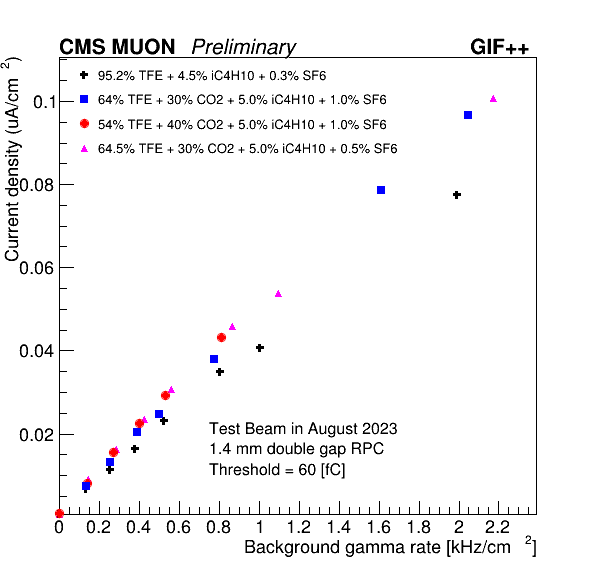

In [12]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Current (uA)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.Draw("AP")
_40CO2.Draw("PSAME")
_30CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 27, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 23, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 19, "Threshold = 60 [fC]")
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("current.png")


In [13]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm^{2}]")
_30CO205SF6.GetYaxis().SetTitle("Current density (uA/cm^{2})")
_30CO205SF6.GetYaxis().SetTitleOffset(1.45)
_30CO205SF6.GetYaxis().SetMaxDigits(3)
_30CO205SF6.Draw("AP")
STDMX.Draw("PSAME")
_40CO2.Draw("PSAME")
_30CO2.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.1, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.75, 0.02, "Test Beam in August 2023");
ltx_data.DrawLatex(0.75, 0.015, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.75, 0.01, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("density_current.png")
canvas.SaveAs("density_current.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file density_current.png has been created
Info in <TCanvas::Print>: pdf file density_current.pdf has been created


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file charge.png has been created


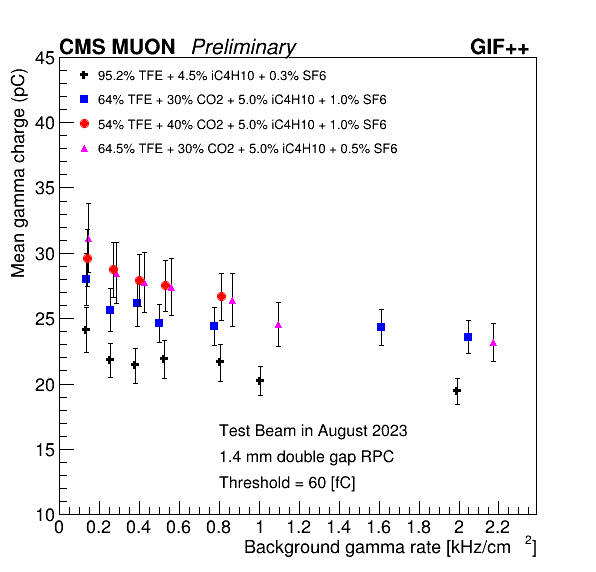

In [14]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
    
_40CO2_charge = 1000000*Features_40CO2['current'].values/(2*2070.5*Features_40CO2['noiseGammaRate'].values/Features_40CO2['gamma_CS'].values)
_40CO2_charge[0] = 0
_40CO2_charge_err = (1000000*Features_40CO2['current'].values/(2*2070.5))*(Features_40CO2['gamma_CS_err'].values/Features_40CO2['noiseGammaRate'].values) 
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   _40CO2_charge,
                   0,
                   _40CO2_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2_charge = 1000000*Features_30CO2['current'].values/(2*2070.5*Features_30CO2['noiseGammaRate'].values/Features_30CO2['gamma_CS'].values)
_30CO2_charge[0] = 0
_30CO2_charge_err = (1000000*Features_30CO2['current'].values/(2*2070.5))*(Features_30CO2['gamma_CS_err'].values/Features_30CO2['noiseGammaRate'].values) 

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   _30CO2_charge,
                   0,
                   _30CO2_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6_charge = 1000000*Features_30CO205SF6['current'].values/(2*2070.5*Features_30CO205SF6['noiseGammaRate'].values/Features_30CO205SF6['gamma_CS'].values)
_30CO205SF6_charge[0] = 0
_30CO205SF6_charge_err = (1000000*Features_30CO205SF6['current'].values/(2*2070.5))*(Features_30CO205SF6['gamma_CS_err'].values/Features_30CO205SF6['noiseGammaRate'].values) 

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   _30CO205SF6_charge,
                   0,
                   _30CO205SF6_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX_charge = 1000000*Features_STDMX['current'].values/(2*2070.5*Features_STDMX['noiseGammaRate'].values/Features_STDMX['gamma_CS'].values)
STDMX_charge[0] = 0
STDMX_charge_err = (1000000*Features_STDMX['current'].values/(2*2070.5))*(Features_STDMX['gamma_CS_err'].values/Features_STDMX['noiseGammaRate'].values) 

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   STDMX_charge,
                   0,
                   STDMX_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm^{2}]")
_30CO205SF6.GetYaxis().SetTitle("Mean gamma charge (pC)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.GetYaxis().SetRangeUser(10., 45.)
_30CO205SF6.GetYaxis().SetMaxDigits(3)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 16., "Test Beam in August 2023");
ltx_data.DrawLatex(0.8, 14., "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 12., "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("charge.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file RXI.png has been created


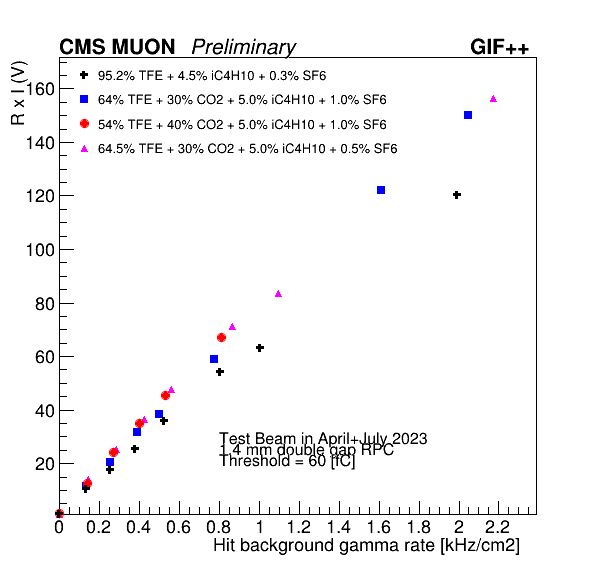

In [15]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   0.75*Features_40CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   0.75*Features_30CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   0.75*Features_30CO205SF6['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   0.75*Features_STDMX['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("R x I (V)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 27, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 23, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 19, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("RXI.png")

In [16]:

TGraphs_list_STDMX = []
func_list_STDMX = []

canvas = TCanvas("c", "c", 564, 232, 600, 600)
HV_ref= 95

k=1

for scan, sigmoid, color, marker in scans_STDMX:
    n = len(HVCurrentDataFrame(scans[scan])['HV_top'])
        
    gr_E = TGraphErrors(n, 
                    #HVCurrentDataFrame(scans[scan])['HV_top'].values - HVCurrentDataFrame(scans[scan])['deltaV'].values, 
                    HVCurrentDataFrame(scans[scan])['HV_top'].values, 
                    HVCurrentDataFrame(scans[scan])['efficiency'].values,
                    #HVCurrentDataFrame(scans[scan])['deltaV_err'].values,
                    0,
                    HVCurrentDataFrame(scans[scan])['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
    gr_E.Fit(sigmoid) # FIT the graph with the sigmoid
    sigmoid.SetLineColor(color)
    gr_E.SetMarkerColor(color)
    gr_E.SetMarkerStyle(marker)
    #estrazione valori da fit
    sig= gr_E.GetFunction("sigmoid"+str(k))
    sig.SetLineColor(color)

    Emax=sig.GetParameter(0)
    Emax_err=sig.GetParError(0)     

    Lambda=sig.GetParameter(1)    
    Lambda_err=sig.GetParError(1)      

    HV50=sig.GetParameter(2)
    HV50_err=sig.GetParError(2)      
    print("Lambda = ", Lambda)
    HV95=sig.GetX(HV_ref)
    HV95_err= math.sqrt(((math.log(19)/Lambda**2)*Lambda_err)**2 + HV50_err**2) #errore HV95
    print("HV95_err = ", HV95_err)

    #check print efficiency curves fitted
    TGraphs_list_STDMX.append(gr_E)
    func_list_STDMX.append(sig)
    gr_E.Draw("AP")
    k=k+1
    #canvas.Draw()
    canvas.SaveAs(scan+".png")

Lambda =  0.01216180708246331
HV95_err =  3.7603528229451637
Lambda =  0.010335318171727925
HV95_err =  3.278368380127679
scanId =  5630
scanId =  5630
scanId =  5630
scanId =  5630
Lambda =  0.010336983687918154
HV95_err =  3.46417866996463
Lambda =  0.01056025004644915
HV95_err =  3.4716011042430694
Lambda =  0.011974763187287744
HV95_err =  4.129418620077054
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      14.1711
NDf                       =            7
Edm                       =  1.14577e-05
NCalls                    =           90
Emax                      =     0.989618   +/-   0.000818564 
Lambda                    =    0.0121618   +/-   0.000163772 
HV50                      =      6787.79   +/-   1.87384     
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      72.1319
NDf                       =           14
Edm                       =    2.731e-07
NCalls               

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 6070 xmax = 7630 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [6070.000000,7630.000000] is not a valid interval
Info in <TCanvas::Print>: png file STDMX_OFF.png has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <TCanvas::Print>: png file STDMX_22.png has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xm

In [17]:
import ROOT
from ROOT import gROOT, TString
from ROOT import TCanvas, TLine, TGaxis, TGraph, gPad, TF1, TF2, kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TGraphErrors, TFile, TTree
import json
import math
from array import array
import numpy as np
import pandas as pd

sigma_factor = (6.2*10e-3)/1.5

def HVCurrentDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    HV_top = []    
    HV_bot = []
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    noiseGammaRate = []
    deltaV_top = []
    deltaV_bot = []
    deltaV_top_err = []
    deltaV_bot_err = []
    for scanId in scanIds:
        !echo "None" >> counter.txt
        !rm counter.txt
        path = "Scans/Scan_00"+str(scanId)+"/*_HV*_CAEN.root"
        !ls {path} >> counter.txt
        counter = np.loadtxt("counter.txt", dtype=str)
        if (str(scanId) == '5634') or (str(scanId) == '5630'):
            print("scanId = ", scanId)
            N = len(counter)
        else:
            N = len(counter)+1
        for i in range(1,N):
            jsonFile = open("Scans/Scan_00"+str(scanId)+"/ANALYSIS/KODELE/HV"+str(i)+"/output.json")
            jsonFile = json.load(jsonFile)
            #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanId)+"/Scan00"+str(scanId)+"_HV"+str(i)+"_CAEN.root","READ")
            hist_current_bot = histFile.Get("Imon_KODELE-BOT")
            hist_current_top = histFile.Get("Imon_KODELE-TOP")
            hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
            hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
            #eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            #eff_error.append((jsonFile['output_parameters']['efficiencyMuon_corrected']*(1-jsonFile['output_parameters']['efficiencyMuon_corrected'])/1000)**0.5)
            eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
            muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
            gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
            muon_CS.append(jsonFile['output_parameters']['muonCLS'])
            gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
            muon_CM.append(jsonFile['output_parameters']['muonCMP'])
            gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
            muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
            gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
            muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
            gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
            noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
            current_bot.append(hist_current_bot.GetMean())
            current_top.append(hist_current_top.GetMean())
            HV_top.append(hist_HV_top.GetMean())
            HV_bot.append(hist_HV_bot.GetMean())
            if (scanId == '5630'):
                deltaV_top.append(0.001)
                deltaV_bot.append(0.001)
            else:
                deltaV_top.append(hist_current_top.GetMean()*1.5)
                deltaV_bot.append(hist_current_bot.GetMean()*1.5)
            deltaV_top_err.append(hist_current_top.GetMean()*6.2*10e-3)
            deltaV_bot_err.append(hist_current_bot.GetMean()*6.2*10e-3)
            histFile.Close()
    DataSet = {'HV_top': HV_top, 
               'HV_bot': HV_bot, 
               'current_top': current_top, 
               'current_bot': current_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'deltaV': (np.array(deltaV_top)*np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001))/(np.array(deltaV_top)+np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001)),
               }
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    DataSet['deltaV_err'] = DataSet['deltaV']* sigma_factor *np.sqrt( (1 + (np.sqrt(DataSet['current_top']**2 + DataSet['current_bot']**2 ) / ( DataSet['current_top']+DataSet['current_bot']  ) )**2 ) ) 
    return DataSet
        
def FeaturesDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    current_bot = []
    current_top = []
    HV_top = []
    HV_bot = []
    noiseGammaRate = []
    noiseGammaRate_err = []
    for scanId in scanIds:
        #jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/output.json")
        print("scanID: ", scanIds[scanId][0])
        
        direc = ""
        N = "1"
        if (int(scanIds[scanId][0])==5810) or (int(scanIds[scanId][0])==5805) or (int(scanIds[scanId][0])==5820) or (int(scanIds[scanId][0])==5826) or (int(scanIds[scanId][0])==5830) or (int(scanIds[scanId][0])==5827) or (int(scanIds[scanId][0])==5815) or (int(scanIds[scanId][0])==5811):    
            N = "7"
        if (int(scanIds[scanId][0])==5841)or (int(scanIds[scanId][0])==5838) or (int(scanIds[scanId][0])==5840):
            N = "8"
        jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/HV"+str(N)+"/output.json")
        histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanIds[scanId][0])+"/Scan00"+str(scanIds[scanId][0])+"_HV"+str(N)+"_CAEN.root","READ")
        hist_current_bot = histFile.Get("Imon_KODELE-BOT")
        hist_current_top = histFile.Get("Imon_KODELE-TOP")
        hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
        hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
        jsonFile = json.load(jsonFile)
        #jsonFile_fornTrig = json.load(jsonFile_fornTrig)
        nTrig = jsonFile['output_parameters']['nTrig']
        #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff.append(100*jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
        muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
        gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
        muon_CS.append(jsonFile['output_parameters']['muonCLS'])
        gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
        muon_CM.append(jsonFile['output_parameters']['muonCMP'])
        gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
        muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
        gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
        muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
        gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
        noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
        noiseGammaRate_err.append(jsonFile['output_parameters']['noiseGammaRate_err'])
        current_bot.append(hist_current_bot.GetMean())
        current_top.append(hist_current_top.GetMean())
        HV_top.append(hist_HV_top.GetMean())
        HV_bot.append(hist_HV_bot.GetMean())
        #print("N: ", N)
        #print("direc: ", direc)
        #print("current: ", hist_current_top.GetMean()+hist_current_bot.GetMean())
        #print("HV: ", hist_HV_top.GetMean())
    DataSet = {'current_top': current_top, 
               'current_bot': current_bot,
               'HV_top': HV_top,
               'HV_bot': HV_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'noiseGammaRate_err': noiseGammaRate_err
              }
        
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    
    return DataSet

sigmoid1 = TF1("sigmoid1","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid1.SetParNames("Emax","Lambda","HV50")
sigmoid1.SetParameters(0.9, 0.01, 7000)
sigmoid2 = TF1("sigmoid2","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid2.SetParNames("Emax","Lambda","HV50")
sigmoid2.SetParameters(0.9, 0.01, 7000)
sigmoid3 = TF1("sigmoid3","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid3.SetParNames("Emax","Lambda","HV50")
sigmoid3.SetParameters(0.9, 0.01, 7000)
sigmoid4 = TF1("sigmoid4","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid4.SetParNames("Emax","Lambda","HV50")
sigmoid4.SetParameters(0.9, 0.01, 7000)
sigmoid5 = TF1("sigmoid5","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid5.SetParNames("Emax","Lambda","HV50")
sigmoid5.SetParameters(0.9, 0.001, 7000)
sigmoid6 = TF1("sigmoid6","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid6.SetParNames("Emax","Lambda","HV50")
sigmoid6.SetParameters(0.9, 0.01, 7000)
sigmoid7 = TF1("sigmoid7","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid7.SetParNames("Emax","Lambda","HV50")
sigmoid7.SetParameters(0.9, 0.01, 7000)
sigmoid8 = TF1("sigmoid8","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid8.SetParNames("Emax","Lambda","HV50")
sigmoid8.SetParameters(0.9, 0.01, 7000)
sigmoid9 = TF1("sigmoid9","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid9.SetParNames("Emax","Lambda","HV50")
sigmoid9.SetParameters(0.9, 0.001, 7000)
sigmoid10 = TF1("sigmoid10","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid10.SetParNames("Emax","Lambda","HV50")
sigmoid10.SetParameters(0.9, 0.01, 7000)
sigmoid11 = TF1("sigmoid11","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid11.SetParNames("Emax","Lambda","HV50")
sigmoid11.SetParameters(0.9, 0.0001, 11000)
sigmoid12 = TF1("sigmoid12","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid12.SetParNames("Emax","Lambda","HV50")
sigmoid12.SetParameters(0.9, 0.01, 7000)
sigmoid13 = TF1("sigmoid13","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid13.SetParNames("Emax","Lambda","HV50")
sigmoid13.SetParameters(0.9, 0.01, 7000)
sigmoid14 = TF1("sigmoid14","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid14.SetParNames("Emax","Lambda","HV50")
sigmoid14.SetParameters(0.9, 0.001, 7000)
sigmoid15 = TF1("sigmoid15","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid15.SetParNames("Emax","Lambda","HV50")
sigmoid15.SetParameters(0.9, 0.001, 7000)
sigmoid16 = TF1("sigmoid16","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid16.SetParNames("Emax","Lambda","HV50")
sigmoid16.SetParameters(0.9, 0.01, 7000)
sigmoid17 = TF1("sigmoid17","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid17.SetParNames("Emax","Lambda","HV50")
sigmoid17.SetParameters(0.9, 0.01, 7000)
sigmoid18 = TF1("sigmoid18","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid18.SetParNames("Emax","Lambda","HV50")
sigmoid18.SetParameters(0.9, 0.01, 7000)
sigmoid19 = TF1("sigmoid19","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid19.SetParNames("Emax","Lambda","HV50")
sigmoid19.SetParameters(0.9, 0.001, 7000)
sigmoid20 = TF1("sigmoid20","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid20.SetParNames("Emax","Lambda","HV50")
sigmoid20.SetParameters(0.9, 0.001, 7000)

scans = {'30CO2_OFF': ['5627'],
         '30CO2_22':  ['5659'],
         '30CO2_10':  ['5675'],
         '30CO2_6.9': ['5621'],
         '30CO2_4.6': ['5623'],
         '30CO2_3.3': ['5622', '5625'],
         '30CO2_2.2': ['5827'],
         '30CO2_1': ['5820'],
         '30CO205SF6_OFF': ['5712'],
         '30CO205SF6_22':  ['5706'],
         '30CO205SF6_10':  ['5707'],
         '30CO205SF6_6.9': ['5708'],
         '30CO205SF6_4.6': ['5709'],
         '30CO205SF6_3.3': ['5713'],
         '30CO205SF6_2.2': ['5840'],
         '30CO205SF6_1': ['5838'],
         '40CO2_OFF': ['5612'],
         '40CO2_22':  ['5615'],
         '40CO2_10':  ['5614'],
         '40CO2_6.9': ['5616'],
         '40CO2_4.6': ['5613'],
         '40CO2_3.3': ['5611'],
         'STDMX_OFF': ['5809'],
         'STDMX_22':  ['5632'],
         'STDMX_10':  ['5631'],
         'STDMX_6.9': ['5633'],
         'STDMX_4.6': ['5630'],
         'STDMX_3.3': ['5629'],
         'STDMX_2.2': ['5805'],
         'STDMX_1': ['5810']
         }
Scans_30CO2 = {'30CO2_OFF': ['5819'],
         '30CO2_22':  ['5826'],
         '30CO2_10':  ['5832'], #HV7
         '30CO2_6.9': ['5830'], #HV7
         '30CO2_4.6': ['5831'],
         '30CO2_3.3': ['5822'],
         '30CO2_2.2': ['5827'], #HV7
         '30CO2_1': ['5820'] #HV7
         }
Scans_40CO2 = {'40CO2_OFF': ['5845'],
         '40CO2_22':  ['5846'],
         '40CO2_10':  ['5844'],
         '40CO2_6.9': ['5843'],
         '40CO2_4.6': ['5842'],
         '40CO2_3.3': ['5841'] # HV8
         }
Scans_STDMX = {'STDMX_OFF': ['5808'],
         'STDMX_22':  ['5813'],
         'STDMX_10':  ['5815'], #HV7
         'STDMX_6.9': ['5811'], #HV7 
         'STDMX_4.6': ['5807'],
         'STDMX_3.3': ['5814'],
         'STDMX_2.2': ['5805'], #HV7
         'STDMX_1': ['5810'], #HV7
         }
Scans_30CO205SF6 = {'30CO205SF6_OFF': ['5833'],
         '30CO205SF6_22':  ['5839'],
         '30CO205SF6_10':  ['5836'],
         '30CO205SF6_6.9': ['5837'],
         '30CO205SF6_4.6': ['5835'],
         '30CO205SF6_3.3': ['5834'],
         '30CO205SF6_2.2': ['5838'], #HV7
         '30CO205SF6_1': ['5840']} #HV7
scans_STDMX = [
         ['STDMX_OFF', sigmoid1, 6, 23],
         ['STDMX_22', sigmoid2, 3, 22],
         ['STDMX_4.6', sigmoid3, 1, 34],
         ['STDMX_3.3', sigmoid4, 2, 20],
         ['STDMX_1', sigmoid5, 4, 21],
         ]
scans_30CO2 = [
         ['30CO2_OFF', sigmoid6, 6, 23],
         ['30CO2_22', sigmoid7, 3, 22],
         ['30CO2_4.6', sigmoid8, 1, 34],
         ['30CO2_3.3', sigmoid9, 2, 20],
         ['30CO2_1', sigmoid10, 4, 21],
         ]
scans_30CO205SF6 = [
         ['30CO205SF6_OFF', sigmoid16, 6, 23],
         ['30CO205SF6_10', sigmoid17, 3, 22],
         ['30CO205SF6_4.6', sigmoid18, 1, 34],
         ['30CO205SF6_2.2', sigmoid19, 2, 20],
         ['30CO205SF6_1', sigmoid20, 4, 21],
         ]
scans_40CO2 = [
         ['40CO2_OFF', sigmoid11, 6, 23],
         ['40CO2_22', sigmoid12, 3, 22],
         ['40CO2_10', sigmoid13, 1, 34],
         ['40CO2_4.6', sigmoid14, 2, 20],
         ['40CO2_3.3', sigmoid15, 4, 21],
         ]

for scan in scans:
    print(scan, ': ')
    print(HVCurrentDataFrame(scans[scan]))

30CO2_OFF : 
    HV_top  HV_bot  current_top  current_bot  muon_stream  gamma_stream  \
0   6000.0  6000.0     0.000000     0.000000     0.000000      0.000000   
1   6100.0  6100.0     0.000000     0.000000     0.000000      0.000000   
2   6200.0  6200.0     0.000000     0.000000     0.000000      0.000000   
3   6300.0  6300.0     0.000000     0.000000     0.000000      0.000000   
4   6400.0  6400.0     0.000000     0.000000     0.000487      0.000000   
5   6500.0  6500.0     0.000000     0.000000     0.000741      0.000000   
6   6600.0  6600.0     0.000000     0.000000     0.001627      0.000000   
7   6700.0  6700.0     0.000000     0.000000     0.001906      0.000000   
8   6800.0  6800.0     0.000000     0.000000     0.002213      0.000000   
9   6900.0  6900.0     0.000000     0.000000     0.006078      0.000000   
10  7000.0  7000.0     0.002920     0.000000     0.005998      0.000050   
11  7100.0  7100.0     0.006515     0.004235     0.007647      0.000000   
12  7200.0  

Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 6070 xmax = 7630 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [6070.000000,7630.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5850 xmax = 7650 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5850.000000,7650.000000] is not a valid interval
Info in <ROOT::Math::B

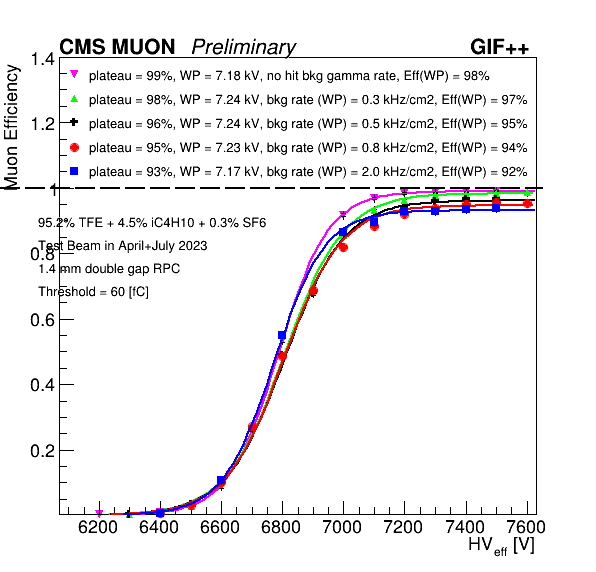

In [18]:

canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)

TGraphs_list_STDMX[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_STDMX[0].SetTitle("")
TGraphs_list_STDMX[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_STDMX[0].Draw("AP")
TGraphs_list_STDMX[1].Draw("PSAME")
TGraphs_list_STDMX[2].Draw("PSAME")
TGraphs_list_STDMX[3].Draw("PSAME")
TGraphs_list_STDMX[4].Draw("PSAME")

Emax_STDMX = []
Emax_err_STDMX = []
Lambda_STDMX = []
Lambda_err_STDMX = []
HV50_STDMX = []
HV50_err_STDMX = []
HV95_STDMX = []
HV95_err_STDMX = []

for sig in func_list_STDMX:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_STDMX.append(Emax_)
    Emax_err_STDMX.append(sig.GetParError(0))     
    Lambda_STDMX.append(sig.GetParameter(1))  
    Lambda_err_STDMX.append(sig.GetParError(1))
    HV50_STDMX.append(sig.GetParameter(2))  
    HV50_err_STDMX.append(sig.GetParError(2)) 
    HV95_STDMX.append(sig.GetX(HV_ref))
    HV95_err_STDMX.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_STDMX = []    

for Emax_, Lambda_, HV50_ in zip(Emax_STDMX, Lambda_STDMX, HV50_STDMX):
    WP_STDMX.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))

txt_STDMX_22 = Features_STDMX['noiseGammaRate'][2]/(Features_STDMX['gamma_CS'][2]*1000)
txt_STDMX_10 = Features_STDMX['noiseGammaRate'][4]/(Features_STDMX['gamma_CS'][4]*1000)
txt_STDMX_46 = Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)
txt_STDMX_33 = Features_STDMX['noiseGammaRate'][7]/(Features_STDMX['gamma_CS'][7]*1000)

eff_1_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[0], b=WP_STDMX[0]/1000., c=(func_list_STDMX[0].Eval(WP_STDMX[0])));
eff_2_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[1], b=WP_STDMX[1]/1000., c=(func_list_STDMX[1].Eval(WP_STDMX[1])), d=txt_STDMX_22);
eff_3_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[2], b=WP_STDMX[2]/1000., c=(func_list_STDMX[2].Eval(WP_STDMX[2])), d=txt_STDMX_10);
eff_4_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[3], b=WP_STDMX[3]/1000., c=(func_list_STDMX[3].Eval(WP_STDMX[3])), d=txt_STDMX_46);
eff_5_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[4], b=WP_STDMX[4]/1000., c=(func_list_STDMX[4].Eval(WP_STDMX[4])), d=txt_STDMX_33);

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[0], eff_1_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[1], eff_2_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[2], eff_3_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[3], eff_4_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[4], eff_5_STDMX, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6000, 0.88, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6");
ltx_data.DrawLatex(6000, 0.81, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6000, 0.74, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6000, 0.67, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7650, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.cd()
canvas_all.SaveAs("STDMX_eff.png")
canvas_all.SaveAs("STDMX_eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")


In [19]:
import ROOT
import numpy as np
import pandas as pd
import glob
import os
import json

sigma_factor = (6.2*10e-3)/1.5

def HVCurrentDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    HV_top = []    
    HV_bot = []
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    noiseGammaRate = []
    deltaV_top = []
    deltaV_bot = []
    deltaV_top_err = []
    deltaV_bot_err = []
    
    for scanId in scanIds:
        scanId_str = str(scanId).zfill(4)
        path = f"Scans/Scan_00{scanId_str}/*_HV*_CAEN.root"
        counter_files = glob.glob(path)
        
        if not counter_files:
            print(f"No files found for scanId {scanId}")
            continue
        
        for i, file_path in enumerate(counter_files):
            json_path = f"Scans/Scan_00{scanId_str}/ANALYSIS/KODELE/HV{i+1}/output.json"
            
            if not os.path.isfile(json_path):
                print(f"JSON file not found: {json_path}")
                continue
            
            with open(json_path) as jsonFile:
                data = json.load(jsonFile)
            
            histFile_path = f"Scans/Scan_00{scanId_str}/Scan00{scanId_str}_HV{i+1}_CAEN.root"
            
            if not os.path.isfile(histFile_path):
                print(f"Histogram file not found: {histFile_path}")
                continue
            
            histFile = ROOT.TFile.Open(histFile_path, "READ")
            hist_current_bot = histFile.Get("Imon_KODELE-BOT")
            hist_current_top = histFile.Get("Imon_KODELE-TOP")
            hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
            hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
            
            eff.append(data['output_parameters']['efficiencyMuon_corrected'])
            eff_error.append(data['output_parameters']['efficiencyMuon_corrected_err'])
            muon_stream.append(data['output_parameters']['muonStreamerProbability'])
            gamma_stream.append(data['output_parameters']['gammaStreamerProbability'])
            muon_CS.append(data['output_parameters']['muonCLS'])
            gamma_CS.append(data['output_parameters']['gammaCLS'])
            muon_CM.append(data['output_parameters']['muonCMP'])
            gamma_CM.append(data['output_parameters']['gammaCMP'])
            muon_CS_err.append(data['output_parameters']['muonCLS_err'])
            gamma_CS_err.append(data['output_parameters']['gammaCLS_err'])
            muon_CM_err.append(data['output_parameters']['muonCMP_err'])
            gamma_CM_err.append(data['output_parameters']['gammaCMP_err'])
            noiseGammaRate.append(data['output_parameters']['noiseGammaRate'])
            current_bot.append(hist_current_bot.GetMean())
            current_top.append(hist_current_top.GetMean())
            HV_top.append(hist_HV_top.GetMean())
            HV_bot.append(hist_HV_bot.GetMean())
            
            if scanId == 5630:
                deltaV_top.append(0.001)
                deltaV_bot.append(0.001)
            else:
                deltaV_top.append(hist_current_top.GetMean()*1.5)
                deltaV_bot.append(hist_current_bot.GetMean()*1.5)
            
            deltaV_top_err.append(hist_current_top.GetMean()*6.2*10e-3)
            deltaV_bot_err.append(hist_current_bot.GetMean()*6.2*10e-3)
            histFile.Close()
            
    DataSet = {'HV_top': HV_top, 
               'HV_bot': HV_bot, 
               'current_top': current_top, 
               'current_bot': current_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'deltaV': (np.array(deltaV_top)*np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001))/(np.array(deltaV_top)+np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001)),
              }
    
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    DataSet['deltaV_err'] = DataSet['deltaV'] * sigma_factor * np.sqrt( (1 + (np.sqrt(DataSet['current_top']**2 + DataSet['current_bot']**2 ) / ( DataSet['current_top'] + DataSet['current_bot']  ) )**2 ) ) 
    
    return DataSet

def FeaturesDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    noiseGammaRate = []
    noiseGammaRate_err = []
    
    for scanId in scanIds:
        scanId_str = str(scanId).zfill(4)
        N = "1"
        if int(scanId) in [5810, 5805, 5820, 5826, 5830, 5827, 5815, 5811]:    
            N = "7"
        elif int(scanId) in [5841, 5838, 5840]:
            N = "8"
        
        json_path = f"Scans/Scan_00{scanId_str}/ANALYSIS/KODELE/HV{N}/output.json"
        
        if not os.path.isfile(json_path):
            print(f"JSON file not found: {json_path}")
            continue
        
        histFile_path = f"Scans/Scan_00{scanId_str}/Scan00{scanId_str}_HV{N}_CAEN.root"
        
        if not os.path.isfile(histFile_path):
            print(f"Histogram file not found: {histFile_path}")
            continue
        
        with open(json_path) as jsonFile:
            data = json.load(jsonFile)
        
        histFile = ROOT.TFile.Open(histFile_path, "READ")
        hist_current_bot = histFile.Get("Imon_KODELE-BOT")
        hist_current_top = histFile.Get("Imon_KODELE-TOP")
        hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
        hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
        
        nTrig = data['output_parameters']['nTrig']
        
        eff.append(100 * data['output_parameters']['efficiencyMuon_corrected'])
        eff_error.append(data['output_parameters']['efficiencyMuon_corrected_err'])
        muon_stream.append(data['output_parameters']['muonStreamerProbability'])
        gamma_stream.append(data['output_parameters']['gammaStreamerProbability'])
        muon_CS.append(data['output_parameters']['muonCLS'])
        gamma_CS.append(data['output_parameters']['gammaCLS'])
        muon_CM.append(data['output_parameters']['muonCMP'])
        gamma_CM.append(data['output_parameters']['gammaCMP'])
        muon_CS_err.append(data['output_parameters']['muonCLS_err'])
        gamma_CS_err.append(data['output_parameters']['gammaCLS_err'])
        muon_CM_err.append(data['output_parameters']['muonCMP_err'])
        gamma_CM_err.append(data['output_parameters']['gammaCMP_err'])
        noiseGammaRate.append(data['output_parameters']['noiseGammaRate'])
        noiseGammaRate_err.append(data['output_parameters']['noiseGammaRate_err'])
        
        current_bot.append(hist_current_bot.GetMean())
        current_top.append(hist_current_top.GetMean())
        histFile.Close()
        
    DataSet = {'current_top': current_top, 
               'current_bot': current_bot, 
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'noiseGammaRate_err': noiseGammaRate_err
              }
    
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    
    return DataSet

# Use the functions and save the DataFrames to CSV
scan_ids = ['5827']  # Replace with your actual scan IDs

hv_df = HVCurrentDataFrame(scan_ids)
features_df = FeaturesDataFrame(scan_ids)

hv_df.to_csv('HVCurrentData.csv', index=False)
features_df.to_csv('FeaturesData.csv', index=False)

print("DataFrames saved to 'HVCurrentData.csv' and 'FeaturesData.csv'")


DataFrames saved to 'HVCurrentData.csv' and 'FeaturesData.csv'
